# Project Insurance Fraud detection

## Problem Statement

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Basic Exploration and Cleaning

In [2]:
df = pd.read_csv(r'C:\Users\srika\OneDrive\Desktop\Scaler_business_case_study_docs\Projects\Additional Personal Project\fraud_oracle - 15k\fraud_oracle.csv')

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
df.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [8]:
df.describe(include = object)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [9]:
for column in df:
    print(column,":\n",df[column].unique(),'\n')

Month :
 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

WeekOfMonth :
 [5 3 2 4 1] 

DayOfWeek :
 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make :
 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea :
 ['Urban' 'Rural'] 

DayOfWeekClaimed :
 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed :
 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

WeekOfMonthClaimed :
 [1 4 2 3 5] 

Sex :
 ['Female' 'Male'] 

MaritalStatus :
 ['Single' 'Married' 'Widow' 'Divorced'] 

Age :
 [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault :
 ['Policy Holder' 'Third Party'] 

PolicyType :

### Columns classification:

Data timestamp details -> ['Month', 'WeekOfMonth', 'DayOfWeek', 'Year']

Claim date details -> ['DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed','Days_Policy_Accident','Days_Policy_Claim']
       
Insured details -> ['Sex','MaritalStatus','AgeOfPolicyHolder','DriverRating','NumberOfCars','Age']

Policy_details -> ['BasePolicy','PolicyType','PolicyNumber', 'RepNumber','Deductible' ]

Vehicle Details -> ['VehiclePrice','Make','AgeOfVehicle', 'VehicleCategory']

claim related Details -> ['AccidentArea', 'PastNumberOfClaims','PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim','Fault' ]

Target varaible -> 'FraudFound_P'

## Analysis and Visulaization

### Univariate Analysis

In [10]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [11]:
df_sort = df.sort_values(by=['Month','WeekOfMonth','DayOfWeek','Year'], ascending=False)

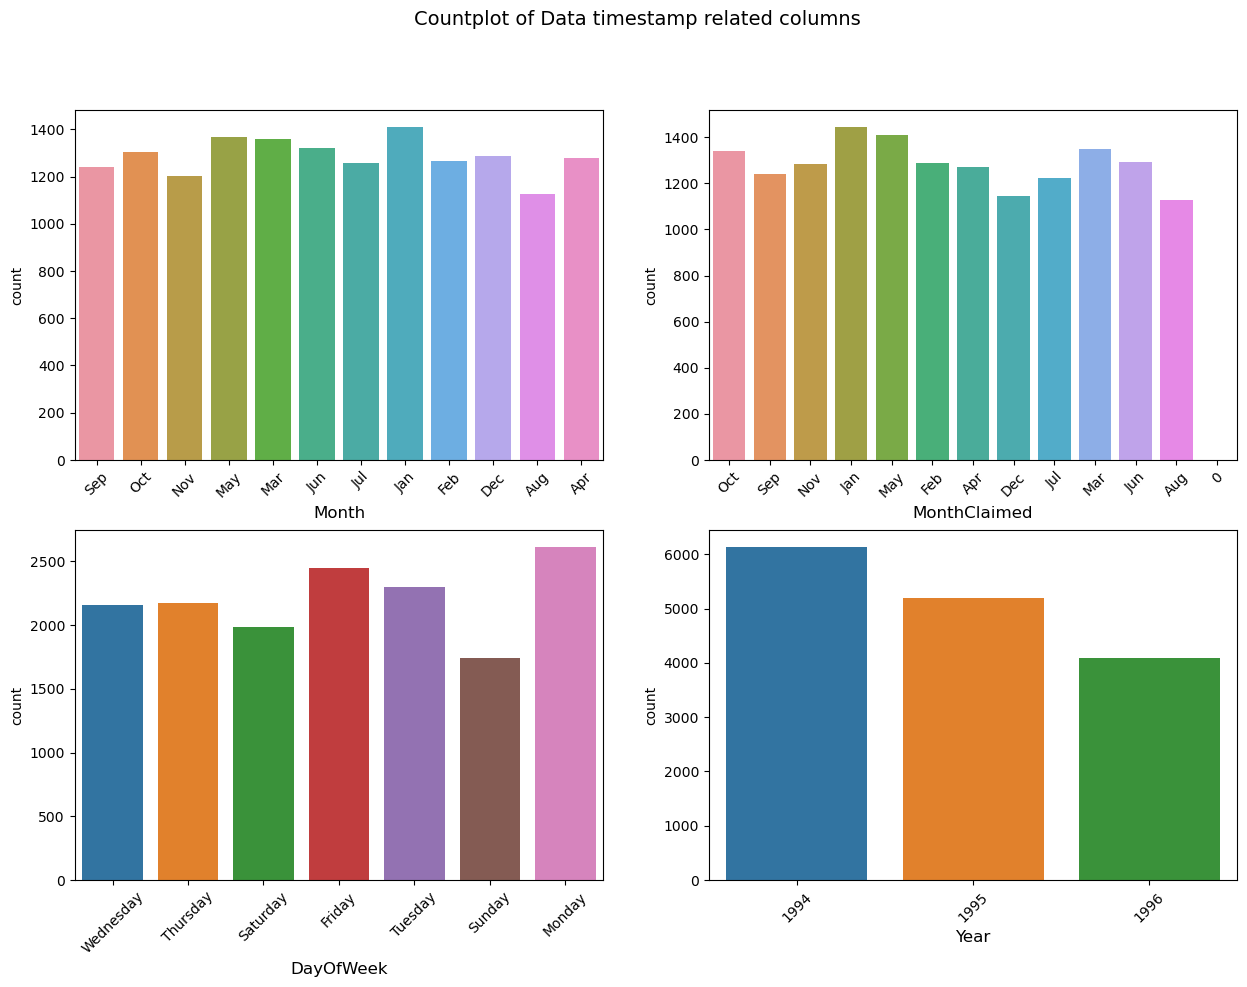

In [12]:
fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data = df_sort, x = 'Month')
plt.xticks(rotation = 45)
plt.xlabel("Month",fontsize = 12)

plt.subplot(2,2,2)
sns.countplot(data = df_sort, x = 'MonthClaimed')
plt.xticks(rotation = 45)
plt.xlabel("MonthClaimed",fontsize = 12)

plt.subplot(2,2,3)
sns.countplot(data = df_sort, x = 'DayOfWeek')
plt.xticks(rotation = 45)
plt.xlabel("DayOfWeek",fontsize = 12)

plt.subplot(2,2,4)
sns.countplot(data = df_sort, x = 'Year')
plt.xticks(rotation = 45)
plt.xlabel("Year",fontsize = 12)



fig.suptitle("Countplot of Data timestamp related columns", fontsize = 14)
plt.show()

The data belongs to years 1994 - 1996. Columns depicts date, week and month which are of no use to the modelling and can be dropped.

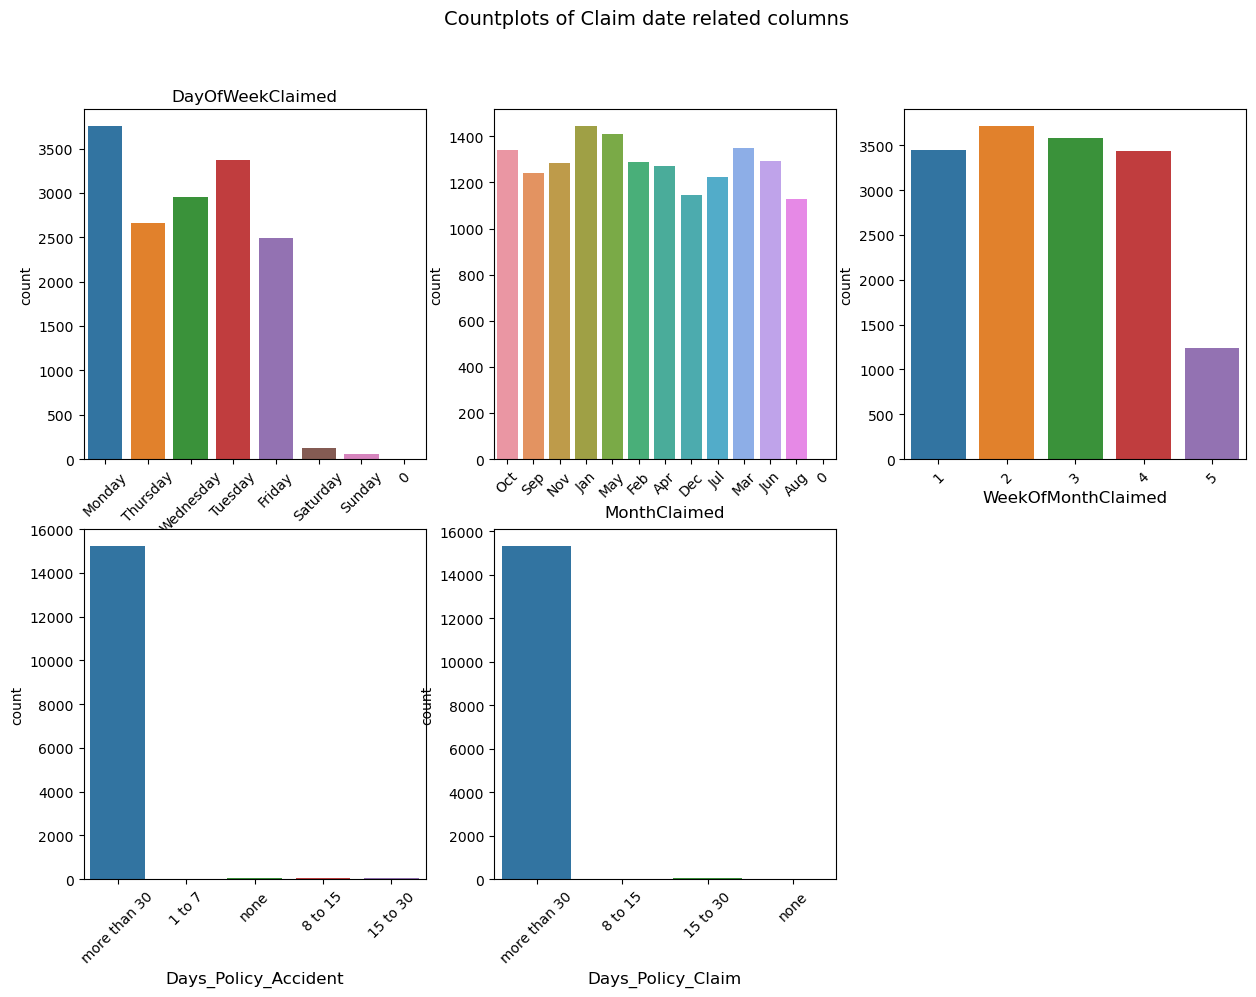

In [13]:
#Claim date details -> ['DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed','Days_Policy_Accident','Days_Policy_Claim']
fig=plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(data = df_sort, x = 'DayOfWeekClaimed')
plt.xticks(rotation = 45)
plt.xlabel("DayOfWeekClaimed",fontsize = 12)
plt.title("DayOfWeekClaimed",fontsize = 12)


plt.subplot(2,3,2)
sns.countplot(data = df_sort, x = 'MonthClaimed')
plt.xticks(rotation = 45)
plt.xlabel("MonthClaimed",fontsize = 12)


plt.subplot(2,3,3)
sns.countplot(data = df_sort, x = 'WeekOfMonthClaimed')
plt.xticks(rotation = 45)
plt.xlabel("WeekOfMonthClaimed",fontsize = 12)


plt.subplot(2,3,4)
sns.countplot(data = df_sort, x = 'Days_Policy_Accident')
plt.xticks(rotation = 45)
plt.xlabel("Days_Policy_Accident",fontsize = 12)

plt.subplot(2,3,5)
sns.countplot(data = df_sort, x = 'Days_Policy_Claim')
plt.xticks(rotation = 45)
plt.xlabel("Days_Policy_Claim",fontsize = 12)

fig.suptitle("Countplots of Claim date related columns", fontsize = 14)
plt.show()

1. Days_policy_accident represents the no. of days accident happened from policy issued, more are inclined to more than 30
2. Days_Policy_Claim represents the no. of days to settle a claim. This is generally 30 -60 days.
3. Good difference is oberserved for DayOfWeekClaimed compared to month and week and also value 0 is part of it which has only one row in data, which can be removed.

In [14]:
df["DayOfWeekClaimed"].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


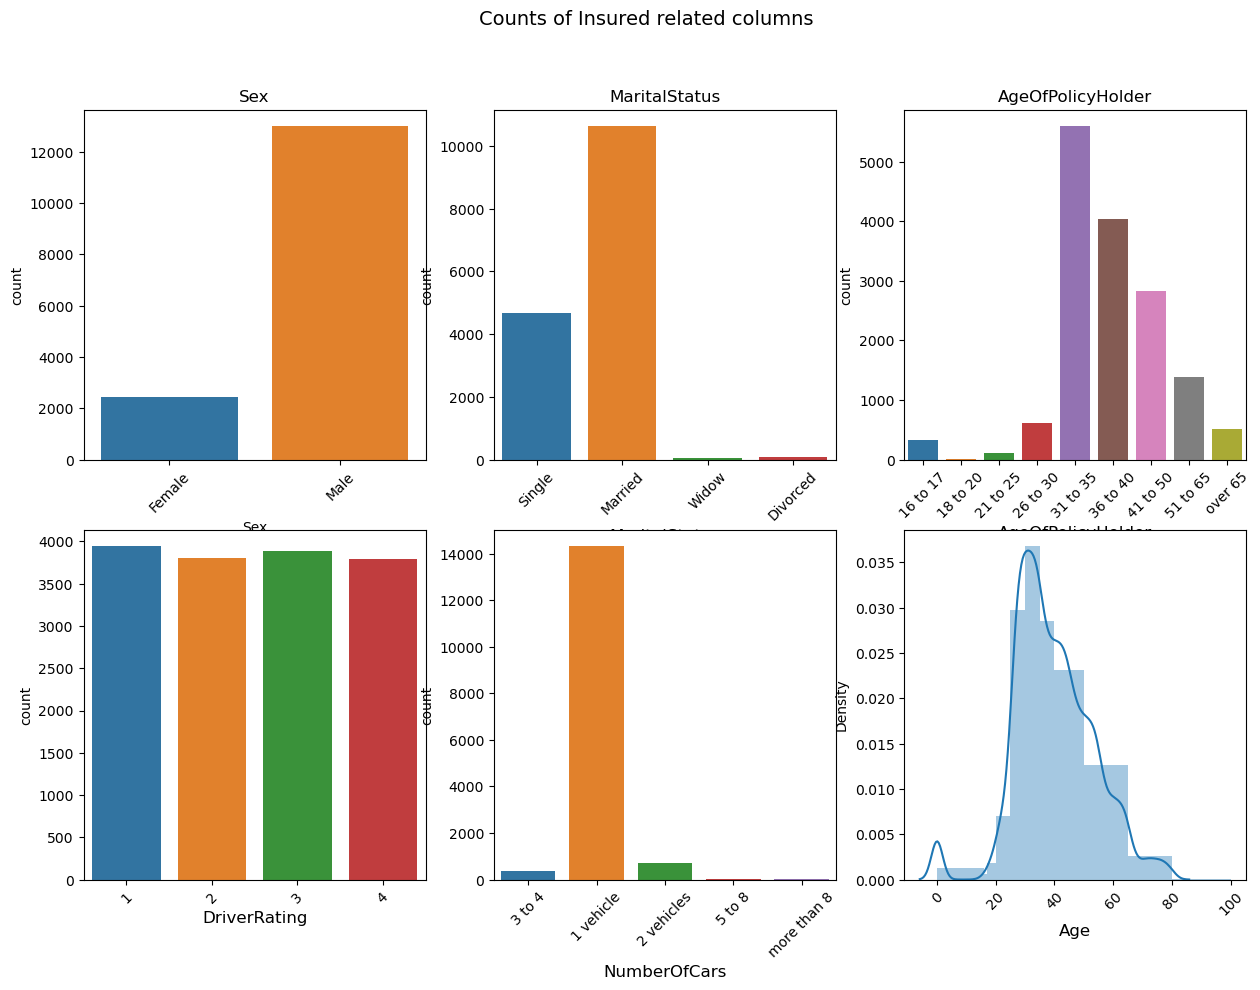

In [15]:
#Insured details -> ['Sex','MaritalStatus','AgeOfPolicyHolder','DriverRating','NumberOfCars','Age']
fig=plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(data = df, x = 'Sex')
plt.xticks(rotation = 45)
#plt.xlabel("Sex",fontsize = 12)
plt.title("Sex",fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(data = df, x = 'MaritalStatus')
plt.xticks(rotation = 45)
plt.xlabel("MaritalStatus",fontsize = 12)
plt.title("MaritalStatus",fontsize = 12)

df_sort = df.sort_values(by = 'AgeOfPolicyHolder', ascending = True)

plt.subplot(2,3,3)
sns.countplot(data = df_sort, x = 'AgeOfPolicyHolder')
plt.xticks(rotation = 45)
plt.xlabel("AgeOfPolicyHolder",fontsize = 12)
plt.title("AgeOfPolicyHolder",fontsize = 12)

plt.subplot(2,3,4)
sns.countplot(data = df, x = 'DriverRating')
plt.xticks(rotation = 45)
plt.xlabel("DriverRating",fontsize = 12)

plt.subplot(2,3,5)
sns.countplot(data = df, x = 'NumberOfCars')
plt.xticks(rotation = 45)
plt.xlabel("NumberOfCars",fontsize = 12)

plt.subplot(2,3,6)
sns.distplot(df['Age'], bins = [0,16,17,20,25,30,35,40,50,65,80,100])
plt.xticks(rotation = 45)
plt.xlabel("Age",fontsize = 12)

fig.suptitle("Counts of Insured related columns", fontsize = 14)
plt.show()

1. Age and AgeofPolicyHolder depicts the same.
2. Most of insured has only one vehicle
3. All Driver ratings have almost equal number

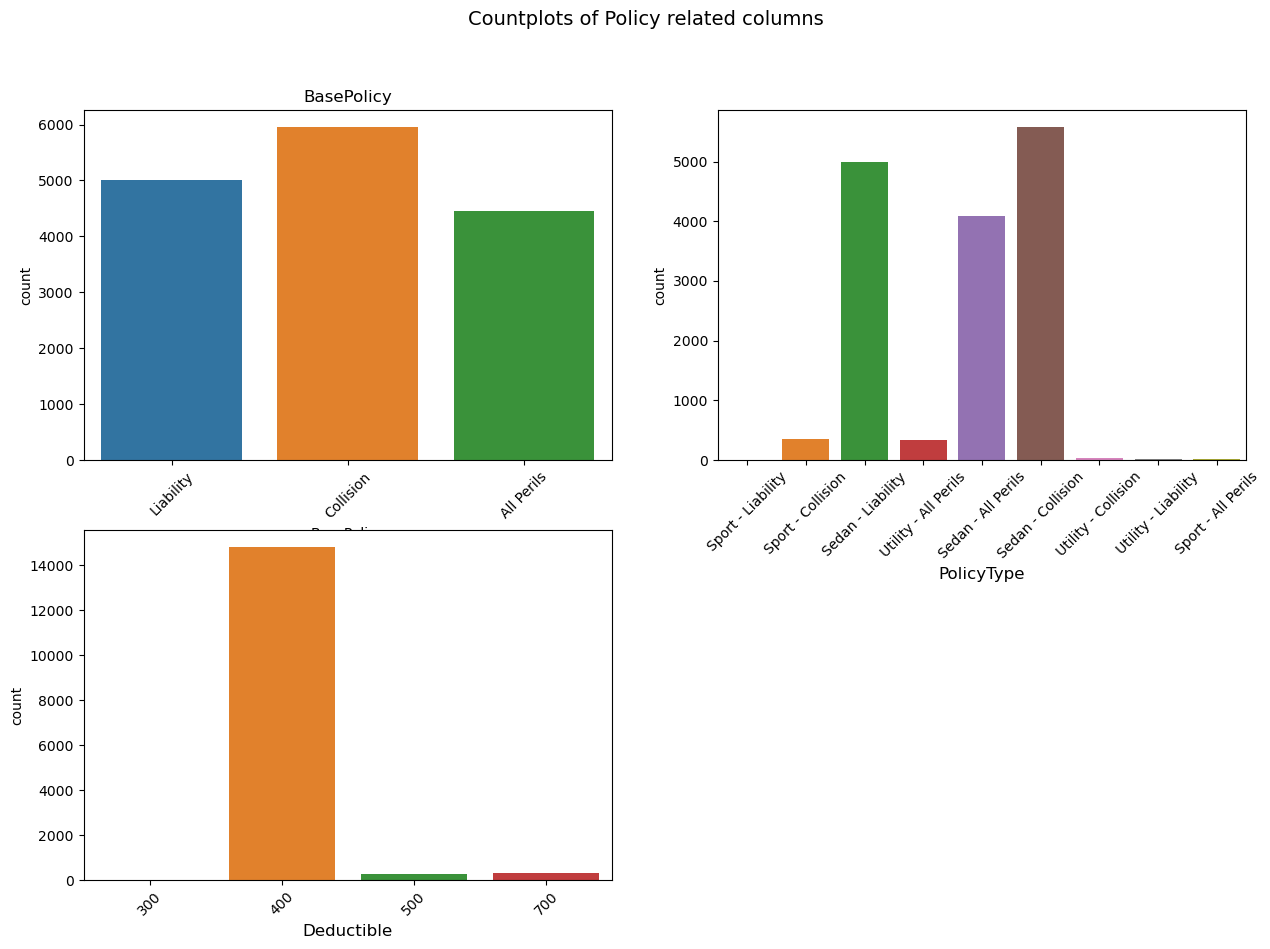

In [16]:
#Policy_details -> ['BasePolicy','PolicyType','PolicyNumber', 'RepNumber','Deductible' ]
fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'BasePolicy')
plt.xticks(rotation = 45)
#plt.xlabel("BasePolicy",fontsize = 12)
plt.title("BasePolicy",fontsize = 12)

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'PolicyType')
plt.xticks(rotation = 45)
plt.xlabel("PolicyType",fontsize = 12)


plt.subplot(2,2,3)
sns.countplot(data = df, x = 'Deductible')
plt.xticks(rotation = 45)
plt.xlabel("Deductible",fontsize = 12)

fig.suptitle("Countplots of Policy related columns", fontsize = 14)
plt.show()

1. Deductible is the amount that insured pay at the time of claim so the rest is payed by insurer based on policy limit
2. Liability -> damages to others, common insurance applicable by law
   All Perils -> Mostly all kind of damages except Natural disaters and some cases based on policy
   collission -> When accident occurs the amount is payed by insurer for vehicle damage
3. In the data, policy number is unique

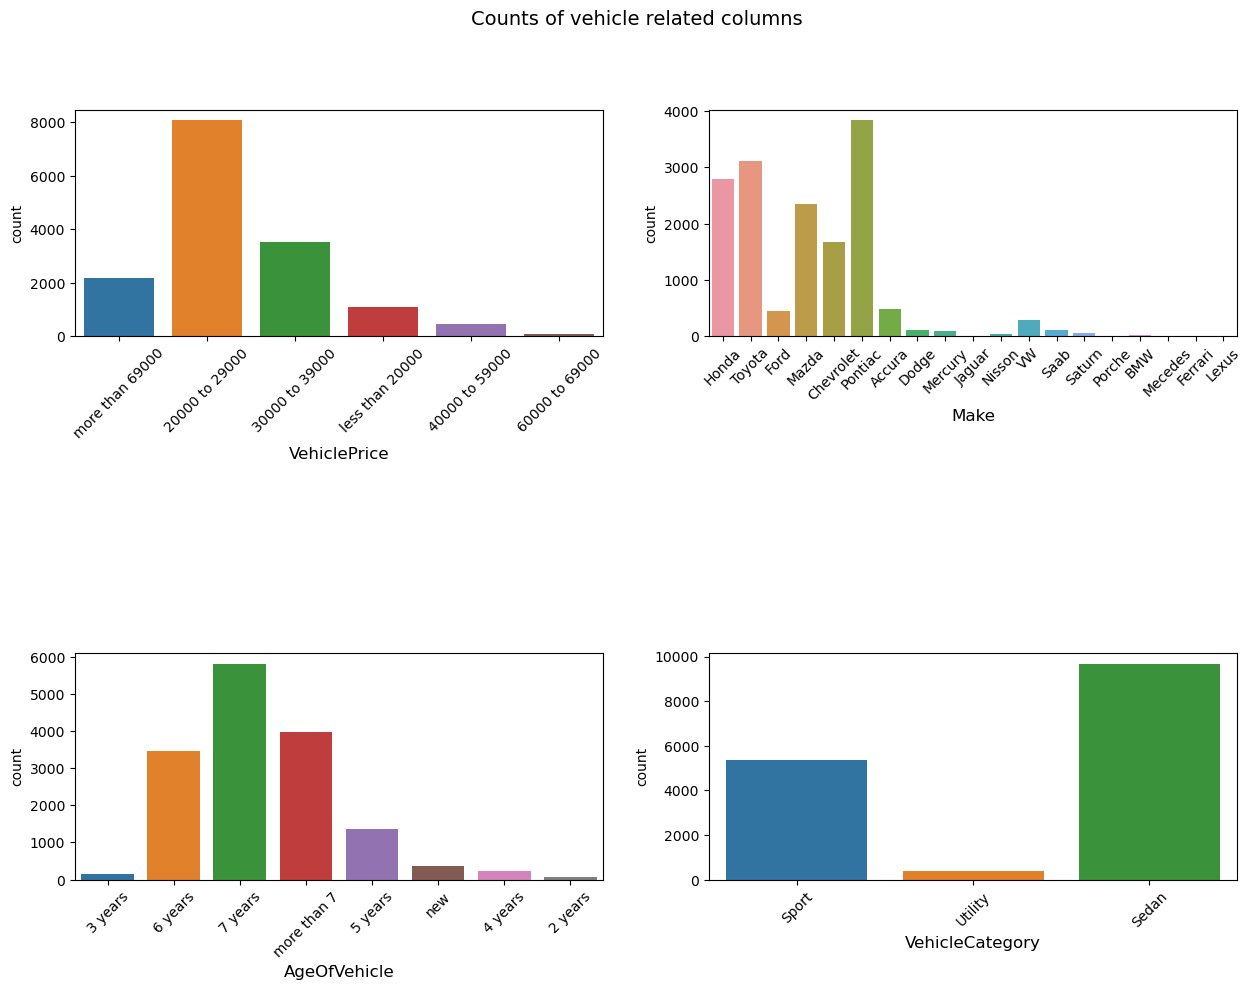

In [17]:
#Vehicle Details -> ['VehiclePrice','Make','AgeOfVehicle', 'VehicleCategory']
fig=plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.countplot(data = df, x = 'VehiclePrice')
plt.xticks(rotation = 45)
plt.xlabel("VehiclePrice",fontsize = 12)
#plt.title("VehiclePrice",fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(data = df, x = 'Make')
plt.xticks(rotation = 45)
plt.xlabel("Make",fontsize = 12)


plt.subplot(3,2,5)
sns.countplot(data = df, x = 'AgeOfVehicle')
plt.xticks(rotation = 45)
plt.xlabel("AgeOfVehicle",fontsize = 12)

plt.subplot(3,2,6)
sns.countplot(data = df, x = 'VehicleCategory')
plt.xticks(rotation = 45)
plt.xlabel("VehicleCategory",fontsize = 12)

fig.suptitle("Counts of vehicle related columns", fontsize = 14)
plt.show()

More vehicles have age greater than 5 years
Medium price range of vehicles are more in the data

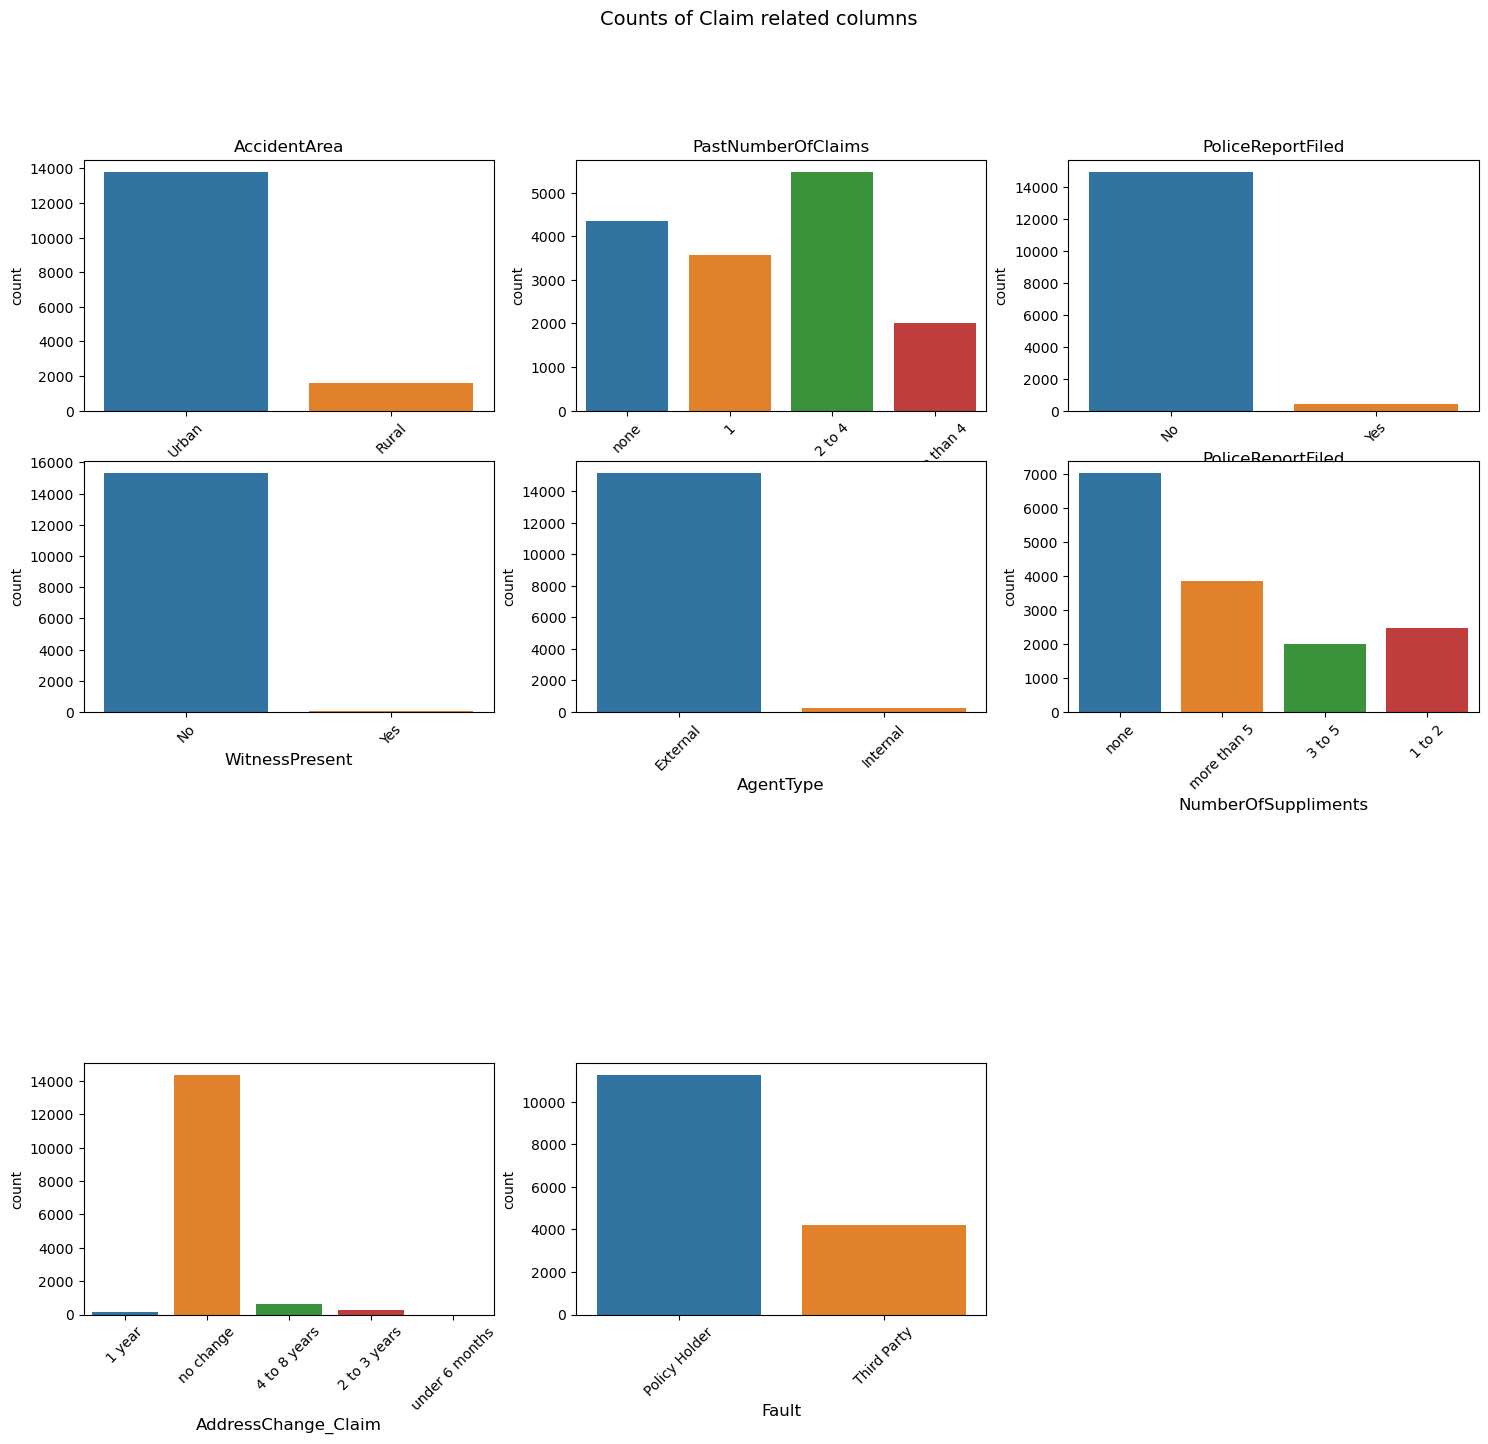

In [18]:
#claim related Details -> ['AccidentArea', 'PastNumberOfClaims','PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim','Fault' ]
fig=plt.figure(figsize=(18,15))

plt.subplot(4,3,1)
sns.countplot(data = df, x = 'AccidentArea')
plt.xticks(rotation = 45)
plt.xlabel("AccidentArea",fontsize = 12)
plt.title("AccidentArea",fontsize = 12)

plt.subplot(4,3,2)
sns.countplot(data = df, x = 'PastNumberOfClaims')
plt.xticks(rotation = 45)
plt.xlabel("PastNumberOfClaims",fontsize = 12)
plt.title("PastNumberOfClaims",fontsize = 12)


plt.subplot(4,3,3)
sns.countplot(data = df, x = 'PoliceReportFiled')
plt.xticks(rotation = 45)
plt.xlabel("PoliceReportFiled",fontsize = 12)
plt.title("PoliceReportFiled",fontsize = 12)

plt.subplot(4,3,4)
sns.countplot(data = df, x = 'WitnessPresent')
plt.xticks(rotation = 45)
plt.xlabel("WitnessPresent",fontsize = 12)

plt.subplot(4,3,5)
sns.countplot(data = df, x = 'AgentType')
plt.xticks(rotation = 45)
plt.xlabel("AgentType",fontsize = 12)

plt.subplot(4,3,6)
sns.countplot(data = df, x = 'NumberOfSuppliments')
plt.xticks(rotation = 45)
plt.xlabel("NumberOfSuppliments",fontsize = 12)

plt.subplot(4,3,10)
sns.countplot(data = df, x = 'AddressChange_Claim')
plt.xticks(rotation = 45)
plt.xlabel("AddressChange_Claim",fontsize = 12)

plt.subplot(4,3,11)
sns.countplot(data = df, x = 'Fault')
plt.xticks(rotation = 45)
plt.xlabel("Fault",fontsize = 12)

fig.suptitle("Counts of Claim related columns", fontsize = 14)
plt.show()

Most of the claims haven't reported to police,no witness and no address change.
External agent -> Works independently and provides insurance from multiple insurance companies
Internal agent -> Works for particular insurance company and provides insurance from that company alone.
Supplements -> Based on needs of insured, insurer provides some benefits Eg.,Medical payment coverage, GAP insrance etc

In [19]:
df['FraudFound_P'].value_counts() # Data has 923 fraud true records

0    14497
1      923
Name: FraudFound_P, dtype: int64

### Bi Variate Analysis -- checking the relation of Y parameter w.r.t other columns

In [20]:
df.shape

(15420, 33)

In [21]:
#Dropping the row containing value of DayOfWeekClaimed zero
df = df.drop(df[df['DayOfWeekClaimed'] == '0'].index)

In [22]:
df.shape

(15419, 33)

In [23]:
df[df['Days_Policy_Accident'] != 'more than 30']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
72,Sep,4,Thursday,Chevrolet,Urban,Monday,Jan,5,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
204,Dec,3,Friday,Pontiac,Urban,Tuesday,Jan,3,Male,Married,...,7 years,36 to 40,No,No,External,none,2 to 3 years,1 vehicle,1994,All Perils
216,Jun,1,Friday,Toyota,Urban,Tuesday,Jun,3,Male,Married,...,more than 7,51 to 65,Yes,No,External,none,no change,1 vehicle,1994,Collision
226,Oct,3,Tuesday,Saab,Urban,Wednesday,Oct,4,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,more than 8,1994,Collision
384,Oct,5,Friday,Honda,Urban,Monday,Nov,2,Male,Married,...,7 years,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15286,Nov,1,Thursday,Honda,Urban,Friday,Nov,3,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15317,May,4,Monday,Mazda,Urban,Wednesday,May,4,Male,Single,...,5 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1996,Liability
15341,Nov,1,Monday,Honda,Urban,Tuesday,Nov,2,Male,Married,...,2 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,Collision
15359,Feb,4,Wednesday,Chevrolet,Urban,Tuesday,Mar,2,Female,Single,...,5 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Collision


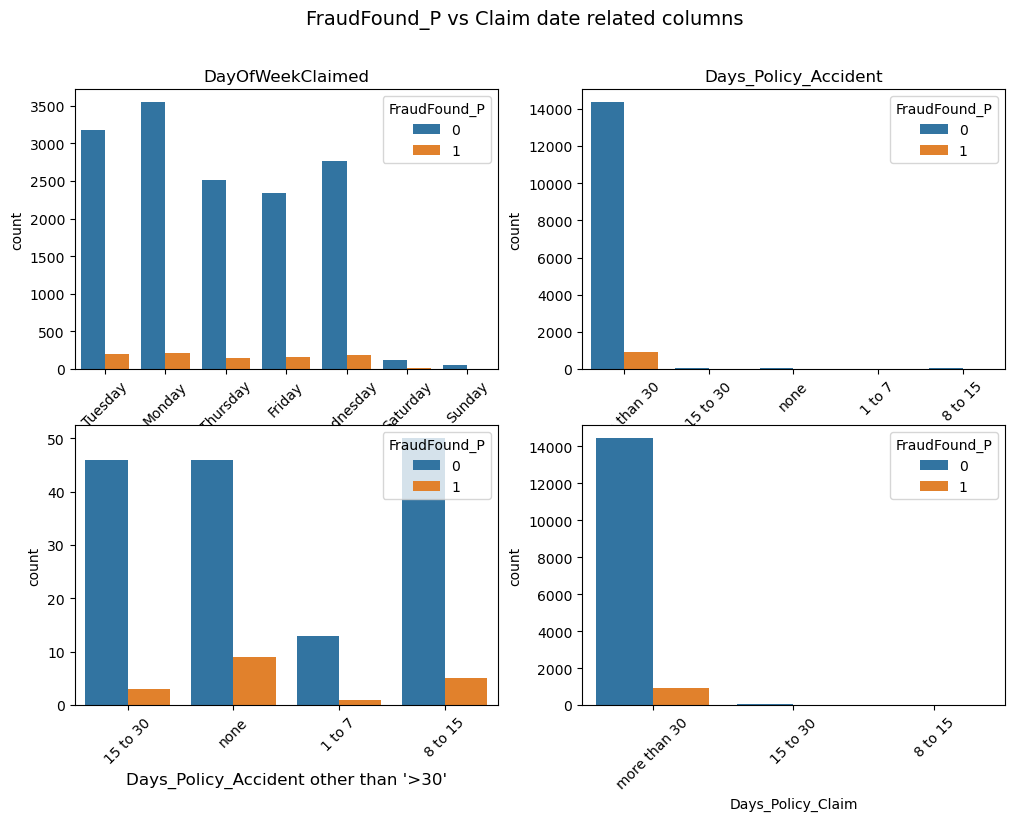

In [24]:
#Claim date details -> ['DayOfWeekClaimed','Days_Policy_Accident','Days_Policy_Claim']
fig=plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'DayOfWeekClaimed', hue = 'FraudFound_P')
plt.xticks(rotation = 45)
#plt.xlabel("DayOfWeekClaimed",fontsize = 12)
plt.title("DayOfWeekClaimed",fontsize = 12)

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Days_Policy_Accident',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.title("Days_Policy_Accident",fontsize = 12)

plt.subplot(2,2,3)
sns.countplot(data = df[df['Days_Policy_Accident'] != 'more than 30'], x = 'Days_Policy_Accident',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("Days_Policy_Accident other than '>30'",fontsize = 12)


plt.subplot(2,2,4)
sns.countplot(data = df, x = 'Days_Policy_Claim',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
#plt.xlabel("Days_Policy_Claim",fontsize = 12)


fig.suptitle("FraudFound_P vs Claim date related columns", fontsize = 14)
plt.show()

In [25]:
df.groupby('Days_Policy_Accident')['FraudFound_P'].value_counts()

Days_Policy_Accident  FraudFound_P
1 to 7                0                  13
                      1                   1
15 to 30              0                  46
                      1                   3
8 to 15               0                  50
                      1                   5
more than 30          0               14341
                      1                 905
none                  0                  46
                      1                   9
Name: FraudFound_P, dtype: int64

In [26]:
df.groupby('Days_Policy_Claim')['FraudFound_P'].value_counts()

Days_Policy_Claim  FraudFound_P
15 to 30           0                  50
                   1                   6
8 to 15            0                  18
                   1                   3
more than 30       0               14428
                   1                 914
Name: FraudFound_P, dtype: int64

In [27]:
df.groupby('Days_Policy_Claim')['FraudFound_P'].value_counts().unstack().fillna(0).apply(lambda x: x / x.sum() * 100, axis=1).rename_axis(['FraudFound_P'], axis=1).stack().reset_index().rename(columns={'Days_Policy_Claim':'Days_Policy_Claim', 0:'Percentage_FraudFound_P'})

,Days_Policy_Claim,FraudFound_P,Percentage_FraudFound_P
0,15 to 30,0,89.285714
1,15 to 30,1,10.714286
2,8 to 15,0,85.714286
3,8 to 15,1,14.285714
4,more than 30,0,94.042498
5,more than 30,1,5.957502


In [28]:
df.groupby('Days_Policy_Accident')['FraudFound_P'].value_counts().unstack().fillna(0).apply(lambda x: x / x.sum() * 100, axis=1).rename_axis(['FraudFound_P'], axis=1).stack().reset_index().rename(columns={'Days_Policy_Accident':'Days_Policy_Accident', 0:'Percentage_FraudFound_P'})

,Days_Policy_Accident,FraudFound_P,Percentage_FraudFound_P
0,1 to 7,0,92.857143
1,1 to 7,1,7.142857
2,15 to 30,0,93.877551
3,15 to 30,1,6.122449
4,8 to 15,0,90.909091
5,8 to 15,1,9.090909
6,more than 30,0,94.064017
7,more than 30,1,5.935983
8,none,0,83.636364
9,none,1,16.363636


In [29]:
df.groupby('Sex')['FraudFound_P','MaritalStatus','AgeOfPolicyHolder'].value_counts()

C:\Users\srika\AppData\Local\Temp\ipykernel_18256\3947897699.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sex')['FraudFound_P','MaritalStatus','AgeOfPolicyHolder'].value_counts()


Sex     FraudFound_P  MaritalStatus  AgeOfPolicyHolder
Female  0             Single         31 to 35             616
                      Married        31 to 35             442
                                     36 to 40             441
                                     41 to 50             272
                      Single         36 to 40             176
                                                         ... 
Male    1             Divorced       31 to 35               1
        0             Widow          over 65                1
                                     31 to 35               1
                      Divorced       over 65                1
        1             Widow          36 to 40               1
Length: 79, dtype: int64

In [30]:
df.groupby('Sex')['FraudFound_P','MaritalStatus'].value_counts()#41 to 50,36 to 40,31 to 35, married, single => female
#male => married,single235

C:\Users\srika\AppData\Local\Temp\ipykernel_18256\3548806713.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Sex')['FraudFound_P','MaritalStatus'].value_counts()#41 to 50,36 to 40,31 to 35, married, single => female


Sex     FraudFound_P  MaritalStatus
Female  0             Married          1261
                      Single            993
        1             Married            64
        0             Divorced           39
        1             Single             38
        0             Widow              22
        1             Widow               2
                      Divorced            1
Male    0             Married          8725
                      Single           3412
        1             Married           575
                      Single            240
        0             Divorced           34
                      Widow              10
        1             Divorced            2
                      Widow               1
dtype: int64

In [31]:
'MaritalStatus','AgeOfPolicyHolder'

('MaritalStatus', 'AgeOfPolicyHolder')

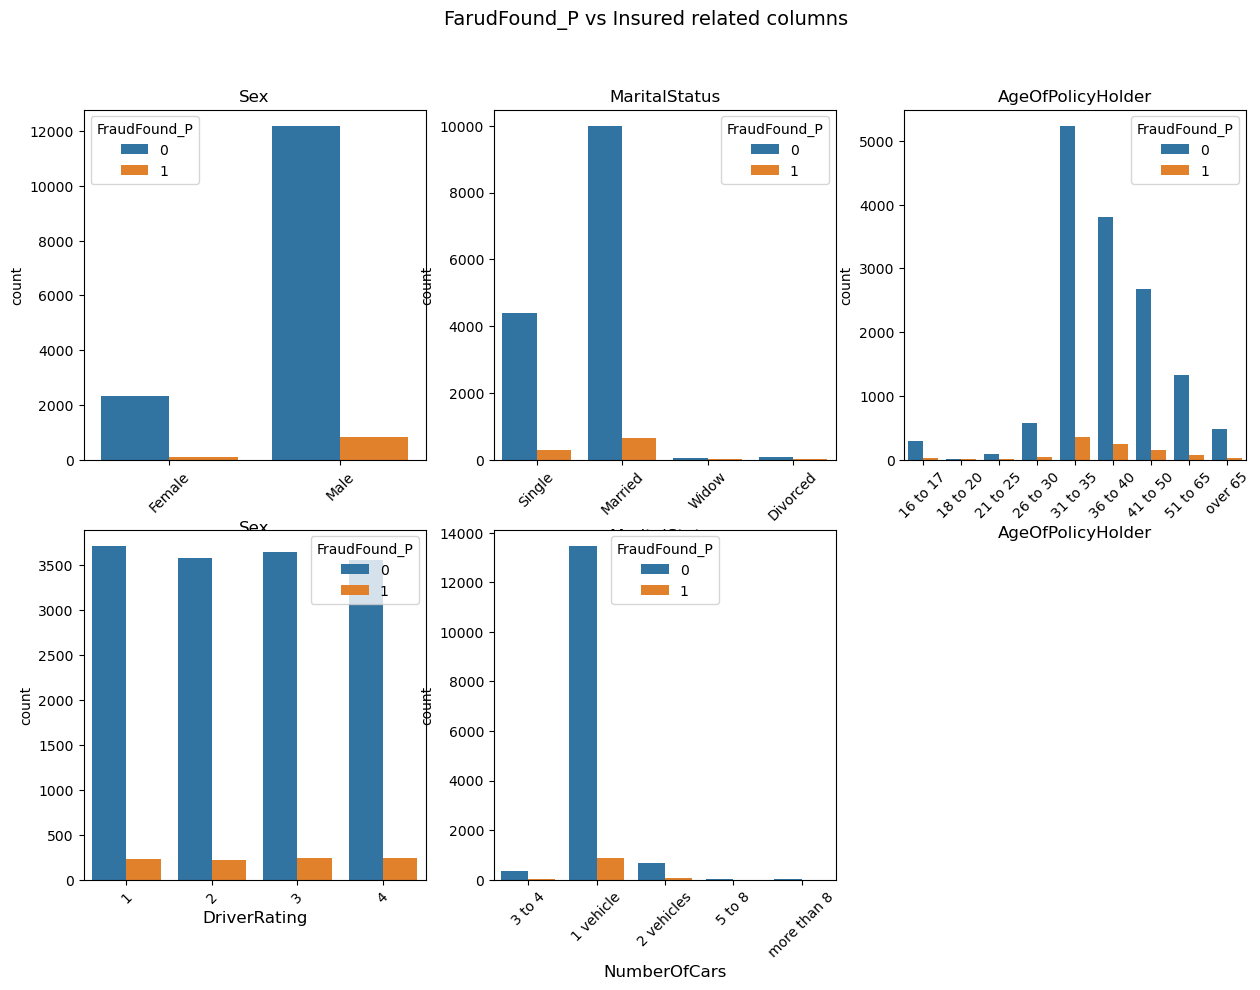

In [32]:
#Insured details -> ['Sex','MaritalStatus','AgeOfPolicyHolder','DriverRating','NumberOfCars']
fig=plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(data = df, x = 'Sex',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("Sex",fontsize = 12)
plt.title("Sex",fontsize = 12)

plt.subplot(2,3,2)
sns.countplot(data = df, x = 'MaritalStatus',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("MaritalStatus",fontsize = 12)
plt.title("MaritalStatus",fontsize = 12)

df_sort = df.sort_values(by = 'AgeOfPolicyHolder', ascending = True)

plt.subplot(2,3,3)
sns.countplot(data = df_sort, x = 'AgeOfPolicyHolder',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("AgeOfPolicyHolder",fontsize = 12)
plt.title("AgeOfPolicyHolder",fontsize = 12)

plt.subplot(2,3,4)
sns.countplot(data = df, x = 'DriverRating',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("DriverRating",fontsize = 12)

plt.subplot(2,3,5)
sns.countplot(data = df, x = 'NumberOfCars',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("NumberOfCars",fontsize = 12)

fig.suptitle("FarudFound_P vs Insured related columns", fontsize = 14)
plt.show()

Could see some variation in all fields compared to Frauds.
The Driver rating column has almost similar variations(Need to see if it can be excluded from model)

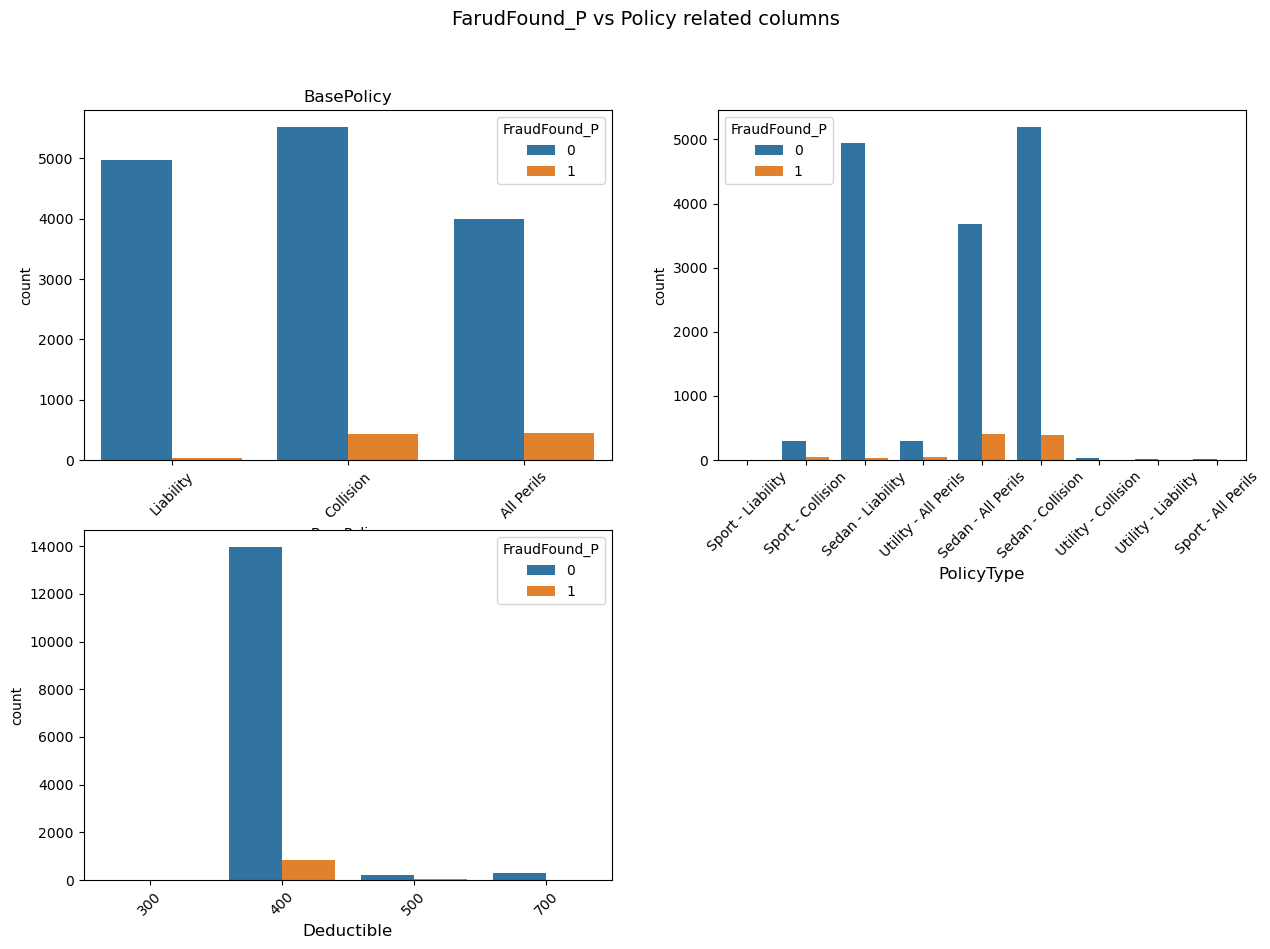

In [33]:
#Policy_details -> ['BasePolicy','PolicyType','Deductible' ]
fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'BasePolicy',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
#plt.xlabel("BasePolicy",fontsize = 12)
plt.title("BasePolicy",fontsize = 12)

plt.subplot(2,2,2)
sns.countplot(data = df, x = 'PolicyType',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("PolicyType",fontsize = 12)


plt.subplot(2,2,3)
sns.countplot(data = df, x = 'Deductible',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("Deductible",fontsize = 12)

fig.suptitle("FarudFound_P vs Policy related columns", fontsize = 14)
plt.show()

In [34]:
df.groupby('Deductible')['FraudFound_P'].value_counts()

Deductible  FraudFound_P
300         0                   6
            1                   2
400         0               13981
            1                 856
500         0                 216
            1                  47
700         0                 293
            1                  18
Name: FraudFound_P, dtype: int64

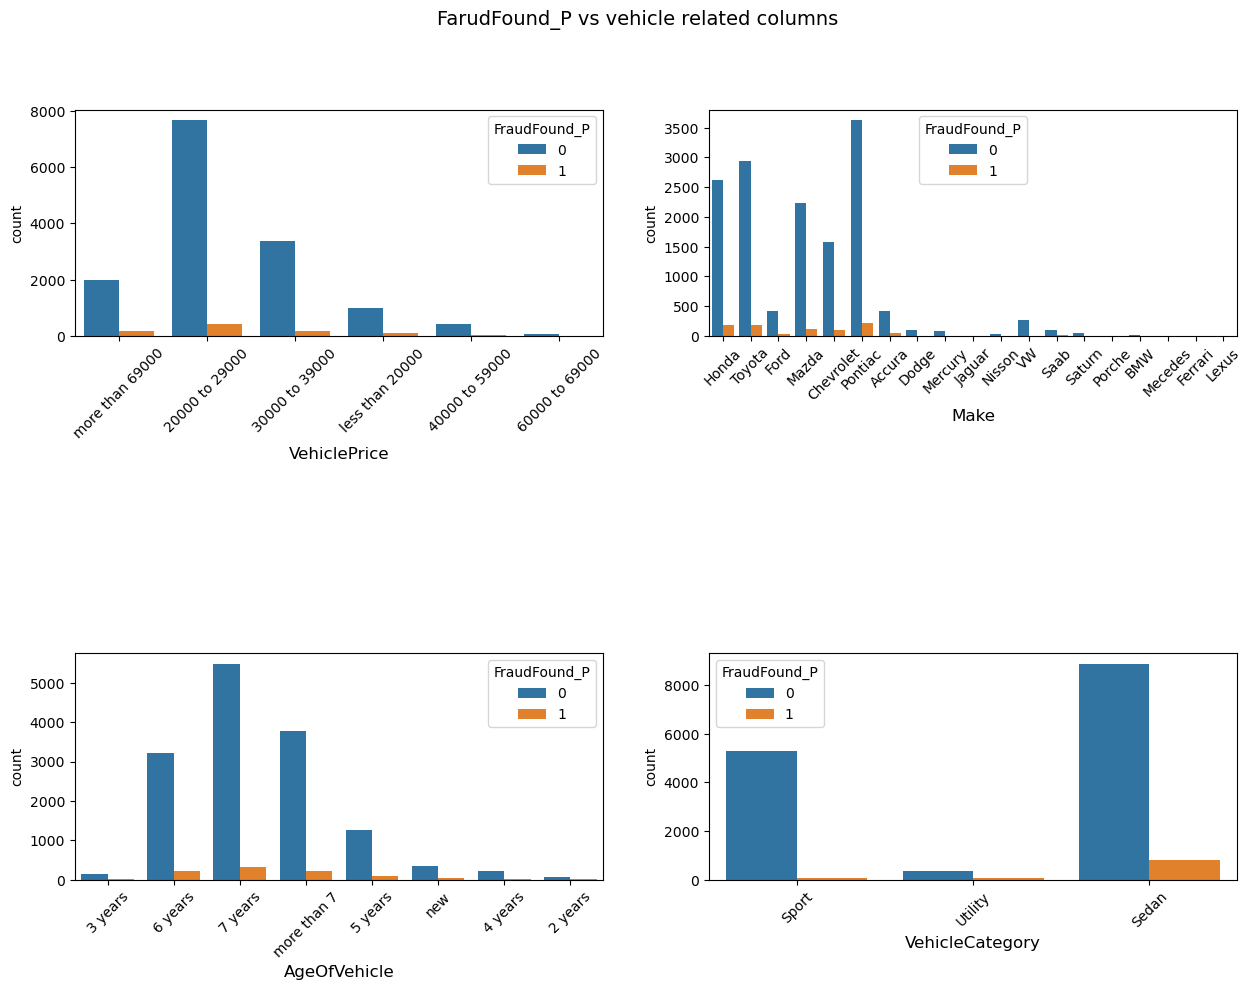

In [35]:
#Vehicle Details -> ['VehiclePrice','Make','AgeOfVehicle', 'VehicleCategory']
fig=plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.countplot(data = df, x = 'VehiclePrice',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("VehiclePrice",fontsize = 12)
#plt.title("VehiclePrice",fontsize = 12)

plt.subplot(3,2,2)
sns.countplot(data = df, x = 'Make',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("Make",fontsize = 12)


plt.subplot(3,2,5)
sns.countplot(data = df, x = 'AgeOfVehicle',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("AgeOfVehicle",fontsize = 12)

plt.subplot(3,2,6)
sns.countplot(data = df, x = 'VehicleCategory',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("VehicleCategory",fontsize = 12)

fig.suptitle("FarudFound_P vs vehicle related columns", fontsize = 14)
plt.show()

In [36]:
df.groupby('Make')['FraudFound_P'].value_counts()

Make       FraudFound_P
Accura     0                413
           1                 59
BMW        0                 14
           1                  1
Chevrolet  0               1587
           1                 94
Dodge      0                107
           1                  2
Ferrari    0                  2
Ford       0                417
           1                 33
Honda      0               2621
           1                179
Jaguar     0                  6
Lexus      0                  1
Mazda      0               2231
           1                123
Mecedes    0                  3
           1                  1
Mercury    0                 77
           1                  6
Nisson     0                 29
           1                  1
Pontiac    0               3624
           1                213
Porche     0                  5
Saab       0                 97
           1                 11
Saturn     0                 52
           1                  6
Toyota     0    

Fraud noticed in mostly in middle ranges. 
Irrespective of make and vehicle category there is fraud in every distinct values of make and vehicle category
Can also try to exclude two columns make and vehicle category from modelling

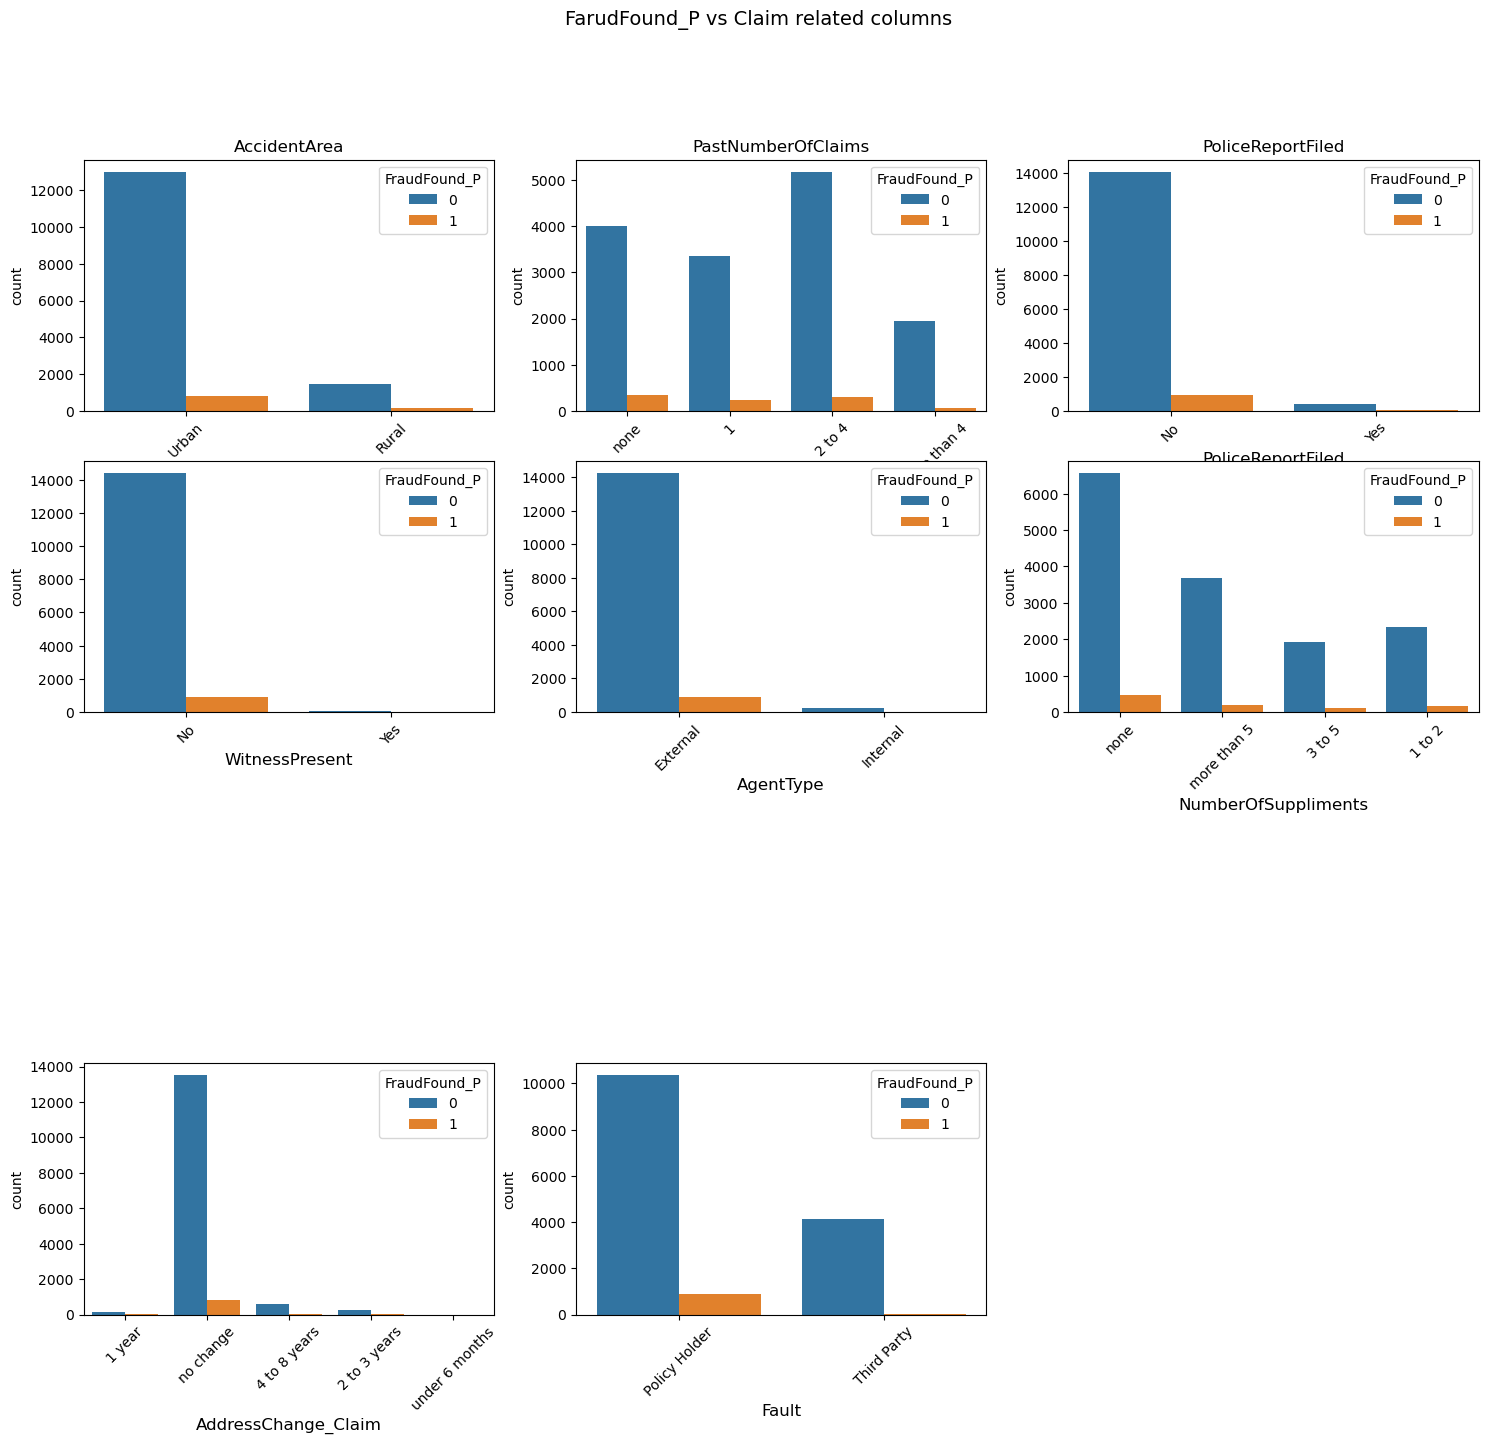

In [37]:
#claim related Details -> ['AccidentArea', 'PastNumberOfClaims','PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim','Fault' ]
fig=plt.figure(figsize=(18,15))

plt.subplot(4,3,1)
sns.countplot(data = df, x = 'AccidentArea',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("AccidentArea",fontsize = 12)
plt.title("AccidentArea",fontsize = 12)

plt.subplot(4,3,2)
sns.countplot(data = df, x = 'PastNumberOfClaims',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("PastNumberOfClaims",fontsize = 12)
plt.title("PastNumberOfClaims",fontsize = 12)


plt.subplot(4,3,3)
sns.countplot(data = df, x = 'PoliceReportFiled',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("PoliceReportFiled",fontsize = 12)
plt.title("PoliceReportFiled",fontsize = 12)

plt.subplot(4,3,4)
sns.countplot(data = df, x = 'WitnessPresent',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("WitnessPresent",fontsize = 12)

plt.subplot(4,3,5)
sns.countplot(data = df, x = 'AgentType',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("AgentType",fontsize = 12)

plt.subplot(4,3,6)
sns.countplot(data = df, x = 'NumberOfSuppliments',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("NumberOfSuppliments",fontsize = 12)

plt.subplot(4,3,10)
sns.countplot(data = df, x = 'AddressChange_Claim',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("AddressChange_Claim",fontsize = 12)

plt.subplot(4,3,11)
sns.countplot(data = df, x = 'Fault',hue = 'FraudFound_P')
plt.xticks(rotation = 45)
plt.xlabel("Fault",fontsize = 12)

fig.suptitle("FarudFound_P vs Claim related columns", fontsize = 14)
plt.show()

Frauds mostly doesn't have witness and agent is external and Fault is ar Policy holder side.


['Month', 'WeekOfMonth', 'DayOfWeek','Year','Age','PolicyNumber', 'RepNumber','MonthClaimed', 'WeekOfMonthClaimed']
Above columns are not much use for modelling hence those can be dropped.

In [38]:
df_new = df.drop(columns = ['Month', 'WeekOfMonth', 'DayOfWeek','Year','Age','PolicyNumber', 'RepNumber','MonthClaimed', 'WeekOfMonthClaimed'])

In [39]:
df_new.columns

Index(['Make', 'AccidentArea', 'DayOfWeekClaimed', 'Sex', 'MaritalStatus',
       'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'FraudFound_P', 'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

Need to do encoding and based on correlation, can drop some other columns and go for modelling.

## Modelling

Rule based system -> accuracy -> One hot encoding , Classification -> 
Selected Featutres:

DayOfWeekClaimed
PoliceReportFiled
WitnessPresent
AgentType
Fault

### Rule based learning

In [40]:
df['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

In [41]:
df = df.reset_index()

In [42]:
df.loc[1517]

index                                1518
Month                                 Dec
WeekOfMonth                             4
DayOfWeek                          Friday
Make                            Chevrolet
AccidentArea                        Urban
DayOfWeekClaimed                  Tuesday
MonthClaimed                          Jan
WeekOfMonthClaimed                      1
Sex                                Female
MaritalStatus                     Married
Age                                    45
Fault                       Policy Holder
PolicyType              Sedan - Collision
VehicleCategory                     Sedan
VehiclePrice               20000 to 29000
FraudFound_P                            0
PolicyNumber                         1519
RepNumber                              12
Deductible                            400
DriverRating                            3
Days_Policy_Accident         more than 30
Days_Policy_Claim            more than 30
PastNumberOfClaims                

PoliceReportFiled
WitnessPresent
AgentType
--External
--Internal
Fault
--'Policy Holder'
'Third Party'

In [43]:
features = ['WitnessPresent','PoliceReportFiled', 'AgentType', 'Fault','Sex','AgeOfPolicyHolder','MaritalStatus']
target = 'FraudFound_P'

In [44]:
x = df.drop(['FraudFound_P'],axis=1)
y = df['FraudFound_P']

In [45]:
##X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [46]:
#Function to predict the fraud label for a given data point
#def predict_fraud(data_point):
#    for rule in rules:
#        if eval(rule[0], data_point):
#            return rule[1]
#    return 0

In [47]:
X_test = df[features]
Y_test = df[target]

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   WitnessPresent     15419 non-null  object
 1   PoliceReportFiled  15419 non-null  object
 2   AgentType          15419 non-null  object
 3   Fault              15419 non-null  object
 4   Sex                15419 non-null  object
 5   AgeOfPolicyHolder  15419 non-null  object
 6   MaritalStatus      15419 non-null  object
dtypes: object(7)
memory usage: 843.4+ KB


In [49]:
#List of rules => Initial
rules = [
    {'WitnessPresent' : "No", 'PoliceReportFiled' : "No",'AgentType' : "External" , 'Fault' : "Policy Holder"},
    {'WitnessPresent': "Yes",'PoliceReportFiled' : "Yes"},
    {'WitnessPresent' : "Yes" , 'PoliceReportFiled' : "Yes" , 'AgentType' : "Internal"}
]

In [50]:
#List of rules
rules = [
    {'WitnessPresent' : "No", 'PoliceReportFiled' : "No",'AgentType' : "External" , 'Fault' : "Policy Holder",'Sex' : "Female", 'AgeOfPolicyHolder' : "26 to 30",'MaritalStatus': "Single" },
    {'WitnessPresent' : "No", 'PoliceReportFiled' : "No",'AgentType' : "External" , 'Fault' : "Policy Holder", 'Sex' : "Male", 'AgeOfPolicyHolder' : "41 to 50",'MaritalStatus': "Married"},
    {'WitnessPresent': "Yes",'PoliceReportFiled' : "Yes"},
    {'WitnessPresent' : "Yes" , 'PoliceReportFiled' : "Yes" , 'AgentType' : "Internal"}
]

def calc_y_pred(X_test):
  output = []
  for rule in rules:
    rule_match_score = 1
    for attribute, value in rule.items():
      rule_match_score *= X_test[attribute].apply(lambda x: x == value).astype(int)
    output.append(rule_match_score)
  return output

In [51]:
def calc_y_pred(X_test, rules):

  y_pred = pd.Series(np.zeros(len(X_test)))

  rule_match_scores = X_test.apply(lambda row: pd.Series(
      np.all([row[attribute] == rule[attribute] for attribute in rule])
       for rule in rules), axis=1)

  y_pred = rule_match_scores.max(axis=1).astype(int)

  return y_pred

In [52]:
# Predictions
Y_pred = calc_y_pred(X_test,rules)

In [53]:
X_test

,WitnessPresent,PoliceReportFiled,AgentType,Fault,Sex,AgeOfPolicyHolder,MaritalStatus
0,No,No,External,Policy Holder,Female,26 to 30,Single
1,No,Yes,External,Policy Holder,Male,31 to 35,Single
2,No,No,External,Policy Holder,Male,41 to 50,Married
3,No,Yes,External,Third Party,Male,51 to 65,Married
4,No,No,External,Third Party,Female,31 to 35,Single
...,...,...,...,...,...,...,...
15414,No,No,External,Policy Holder,Male,31 to 35,Married
15415,No,No,External,Policy Holder,Male,31 to 35,Married
15416,No,No,External,Policy Holder,Male,26 to 30,Single
15417,No,No,External,Third Party,Female,31 to 35,Married


In [54]:
Y_test.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15419 entries, 0 to 15418
Series name: FraudFound_P
Non-Null Count  Dtype
--------------  -----
15419 non-null  int64
dtypes: int64(1)
memory usage: 120.6 KB


In [55]:
Y_pred.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15419 entries, 0 to 15418
Series name: None
Non-Null Count  Dtype
--------------  -----
15419 non-null  int32
dtypes: int32(1)
memory usage: 60.4 KB


In [64]:
#Another  function
def same_elements():
    num_elements_same = 0
    for i in range(len(Y_pred)-1):
        if Y_pred[i] == Y_test[i]:
            num_elements_same = num_elements_same + 1
    return num_elements_same

In [56]:
Y_pred.head() # 10812

0    1
1    0
2    1
3    0
4    0
dtype: int32

In [57]:
Y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: FraudFound_P, dtype: int64

In [58]:
X_test.head()#1 and 3 indexes

,WitnessPresent,PoliceReportFiled,AgentType,Fault,Sex,AgeOfPolicyHolder,MaritalStatus
0,No,No,External,Policy Holder,Female,26 to 30,Single
1,No,Yes,External,Policy Holder,Male,31 to 35,Single
2,No,No,External,Policy Holder,Male,41 to 50,Married
3,No,Yes,External,Third Party,Male,51 to 65,Married
4,No,No,External,Third Party,Female,31 to 35,Single


In [59]:
df_new.loc[2]#first #Female,Single =>(26 to 30),#Male,Married, Age => 41 to 50

Make                                Honda
AccidentArea                        Urban
DayOfWeekClaimed                 Thursday
Sex                                  Male
MaritalStatus                     Married
Fault                       Policy Holder
PolicyType              Sport - Collision
VehicleCategory                     Sport
VehiclePrice              more than 69000
FraudFound_P                            0
Deductible                            400
DriverRating                            3
Days_Policy_Accident         more than 30
Days_Policy_Claim            more than 30
PastNumberOfClaims                      1
AgeOfVehicle                      7 years
AgeOfPolicyHolder                41 to 50
PoliceReportFiled                      No
WitnessPresent                         No
AgentType                        External
NumberOfSuppliments                  none
AddressChange_Claim             no change
NumberOfCars                    1 vehicle
BasePolicy                      Co

In [65]:
accuracy = (same_elements()/(len(Y_pred))) * 100
accuracy

84.64880990985148